# 4.Support vector Machine


Aprenentatge **supervisat**, classificació o d’anàlisis de regressió(és la tendència d'una mesura extrema a presentar-se més propera a la mitjana). 

**Entrada** es un set de dades, prediu per cada element d’entrada quines de les **dues classes** pertany. 

Necessita **entrenament** previ per poder classificar les dues classes entrants. 

Es un **model N-dimensional**, la diferencia de classes ha de ser la més amplia possible i un marge d’error que sigui casi zero(el menor possible).

El **vector resultant** es forma a traves de dues línies paral·leles, la distancia més gran entre elles es el marge. 

Hi ha diferents tipus de classificació:
SVC and NuSVC are similar methods, LinearSVC(més rapid)


**Avantatges :**

* Útil en **grans** dimensions.

* **Eficaç** quan el nombre de dimensions es més elevat que el nombre de mostres. 

* Utilitza un subconjunt de punts d'entrenament a la funció de decisió (anomenats support vectors), fent que també és **eficient amb la memòria**.

**Desavantatges:**

* Nomes es útil en **classes** de **dos**(0 o 1), per seperar dos tipus de classes.

* **Difícil d’interpretar el resultat**. Els SVM no proporcionen directament estimacions de probabilitat, es calculen utilitzant una validació creuada quíntuple


**Pasos a seguir per el SVM:**

1.	Import the Libraries-
2.	Load the Dataset.
3.	Split Dataset into X and Y.
4.	Split the X and Y Dataset into the Training set and Test set.
5.	Perform Feature Scaling.
6.	Fit SVM to the Training set.
7.	Predict the Test Set Results.
8.	Make the Confusion Matrix.


importem llibreries

Libraries import


In [1]:
import numpy as np #per treballar amb arrays
import matplotlib.pyplot as plt  #grafics
import pandas as pd #data wrangling and analysis.

Load dataset

In [2]:
dataset = pd.read_csv('Social_Network_Ads.csv')

 remove these two variables and split the dataset into X and Y.
Here X represents independent variables and Y represents dependent variables.

In [3]:
X = dataset.iloc[:, [2, 3]].values #edat i salary
y = dataset.iloc[:, 4].values # compra o no

Split the X and Y Dataset into the Training set and Test set
Train and test models

In [4]:
from sklearn.model_selection import train_test_split
#80%-90% of your data should be in the training tests
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)
# es pot modifocar la mida del test


Perform Feature Scaling
All values are not in the same range. we perform feature scaling.
Helps us to normalize the data within a particular range.

In [5]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Fit SVM to the Training set

In [6]:
from sklearn.svm import SVC #Support Vector Classification.
#This SVC class allows us to build a kernel SVM model
# ‘rbf’, because it is nonlinear and gives better results as compared to linear.
classifier = SVC(kernel = 'rbf', random_state = 0)
classifier.fit(X_train, y_train)

SVC(random_state=0)

Predict the Test Set Results

In [7]:
y_pred = classifier.predict(X_test)


Large dataset, And that’s why we use a confusion matrix, to clear our confusion.
Make the Confusion Matrix

In [8]:
from sklearn.metrics import confusion_matrix, accuracy_score

cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[55  3]
 [ 1 21]]


0.95

Visualise the Test set results

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


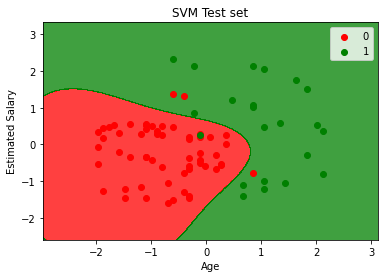

In [9]:
from matplotlib.colors import ListedColormap

X_set, y_set = X_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM Test set')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

Referencies:

1.4. Support Vector Machines
https://scikit-learn.org/stable/modules/svm.html